In [ ]:
# 해당 파일은 python 3.10.9에서 작성 되었습니다.

'1.jpg' 파일의 결과는 다음과 같습니다.

인식된 번호판 패턴 : 19오7777

'2.jpg' 파일의 결과는 다음과 같습니다.

인식된 번호판 패턴 : 49허1769

'3.jpg' 파일의 결과는 다음과 같습니다.

번호판 패턴을 찾을 수 없음
번호판 패턴을 찾을 수 없음
인식된 번호판 패턴 : 54가0639

'4.jpg' 파일의 결과는 다음과 같습니다.

번호판 패턴을 찾을 수 없음
번호판 패턴을 찾을 수 없음
인식된 번호판 패턴 : 35리6110
번호판 패턴을 찾을 수 없음
번호판 패턴을 찾을 수 없음

결과가 image_results.json 파일로 저장되었습니다.


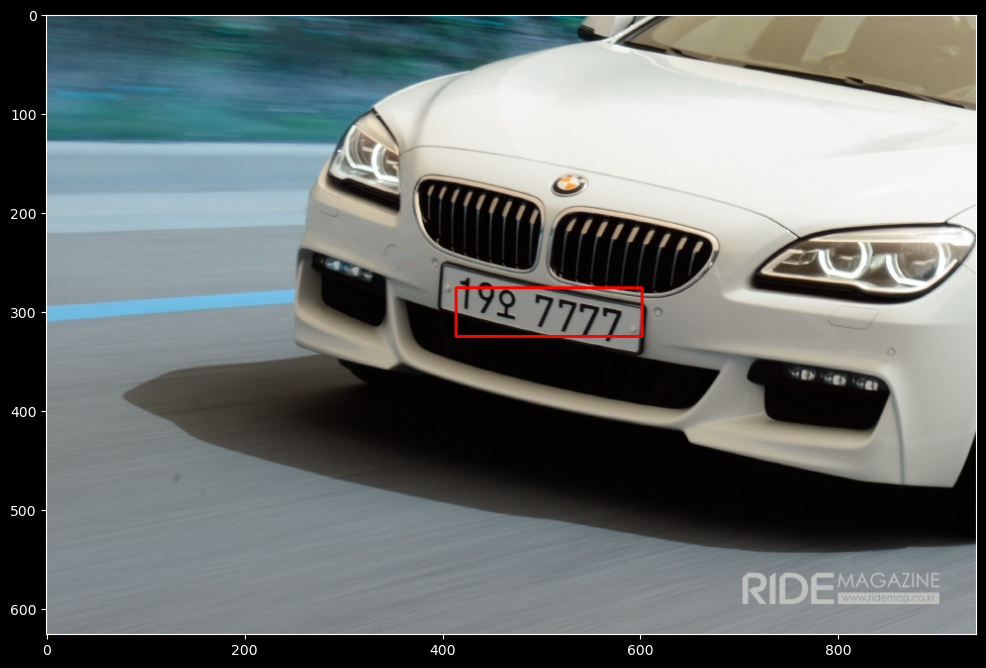

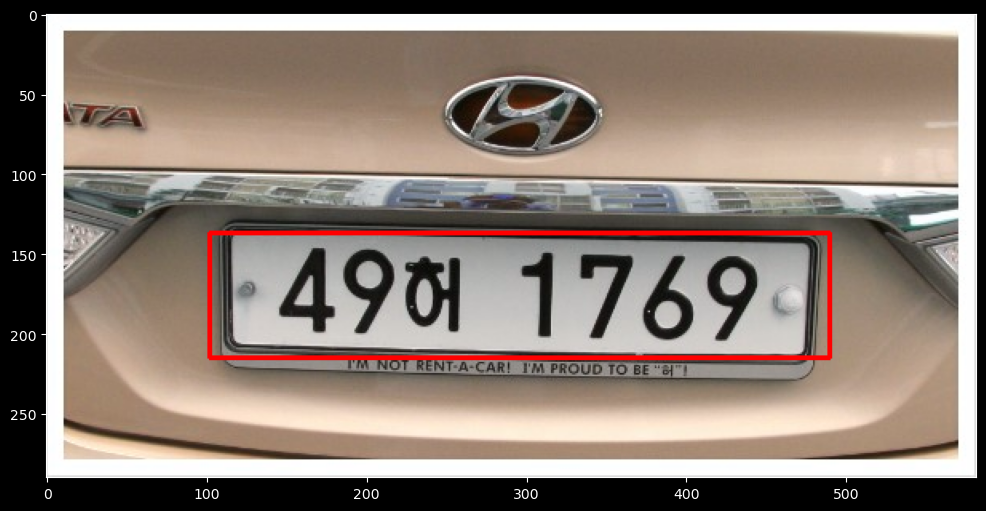

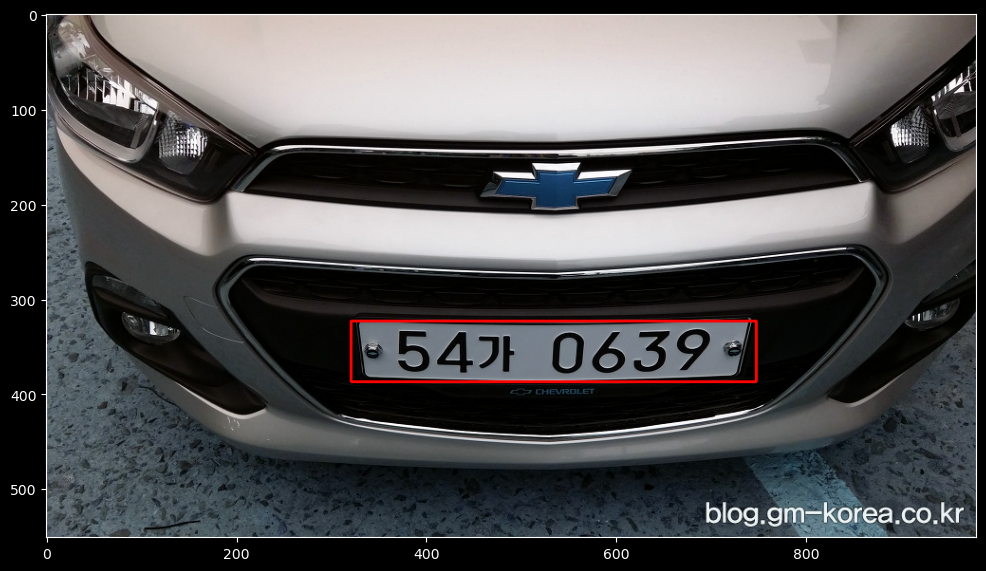

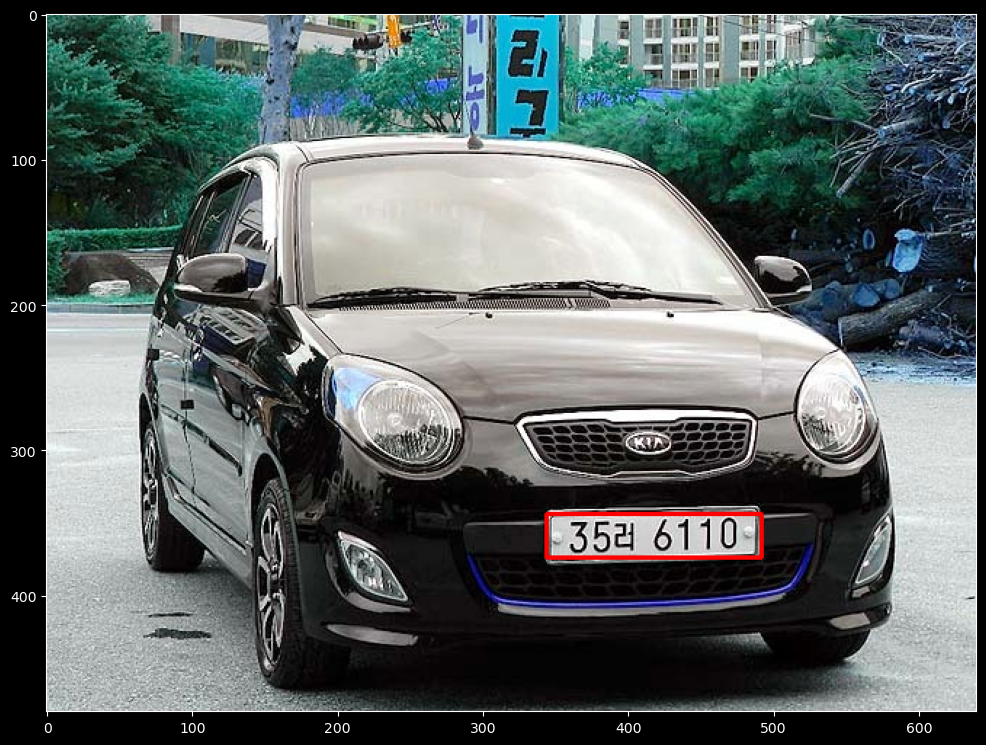

In [1]:
import json
import os
import re
from datetime import datetime
import tesseract_image  # 사용자 지정 함수 import

# 작성자 이름
creator_name = "김민수"

# 폴더 경로 설정
folder_path = "./github"

# 출처 (from_data, url)
last_folder_name = os.path.basename(folder_path)
url = "https://github.com/kairess/license_plate_recognition.git"

# 결과를 저장할 리스트
results = []

# 폴더 내의 파일 목록을 가져오기
file_list = os.listdir(folder_path)

# 파일 목록을 순회하면서 tesseract 함수 호출
for filename in file_list:
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        file_path = os.path.join(folder_path, filename)  # 파일의 전체 경로

        # 사용자 지정 함수 실행 후 리턴 값 받아오기
        matched_pattern, x_coord, y_coord = tesseract_image.tesseract(file_path)

        # 실행하고 있는 시점의 yy-mm-dd 가져오기
        formatted_date = datetime.now().strftime("%Y-%m-%d")

        # JSON 데이터 구성
        data = {
            "creator_name": f"{creator_name}",
            "file_ID": f"{formatted_date}-{os.path.basename(file_path)}",
            "x": x_coord,
            "y": y_coord,
            "date": formatted_date,
            "from_data": f"{last_folder_name}",
            "url": f"{url}",
            "category": re.sub(r'[^가-힣]', '', matched_pattern)
        }

        results.append(data)

# 결과를 JSON 파일로 저장
output_filename = "image_results.json"
with open(output_filename, 'w', encoding='utf-8') as json_file:
    json.dump(results, json_file, ensure_ascii=False, indent=4)

print(f"결과가 {output_filename} 파일로 저장되었습니다.")
